In [2]:
conda install -c districtdatalabs yellowbrick

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.0
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/marleneaviles/opt/anaconda3/envs/NewPython

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         156 KB
    yellowbrick-1.0.1          |           py37_0         453 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         608 KB

The following NEW packages will be INSTALLED:

  yellowbrick        districtdatalabs/osx-64::yellowbrick-1.0.1-py37_0

The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1d-h0b31af3_0 --> pkgs/

In [1]:
conda install -c anaconda scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.0
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/marleneaviles/opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.27 |                0         131 KB  anaconda
    certifi-2019.11.28         |           py37_0         156 KB  anaconda
    conda-4.8.1                |           py37_0         3.0 MB  anaconda
    joblib-0.14.1              |             py_0         202 KB  anaconda
    openssl-1.1.1              |       h1de35cc_0         4.6 MB  anaconda
    scikit-learn-0.22.1        |   py37h27c97d8_0         6.2 MB  anaconda
    scipy-1.3.1                |   py37h1410ff5_0        16.0 MB  anacon

# Titanic Case Study - Part 1 Tutorial 
Marlene Aviles 
DSC 550: Data Mining 
Week 6

In [2]:
import pandas as pd 
import numpy as np
import yellowbrick

/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
addr1 = "train.csv"
data = pd.read_csv(addr1)

In [4]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (891, 12)


In [5]:
#Step 3:  Look at the data
print(data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Summarized Data
                            Name   Sex  Ticket     

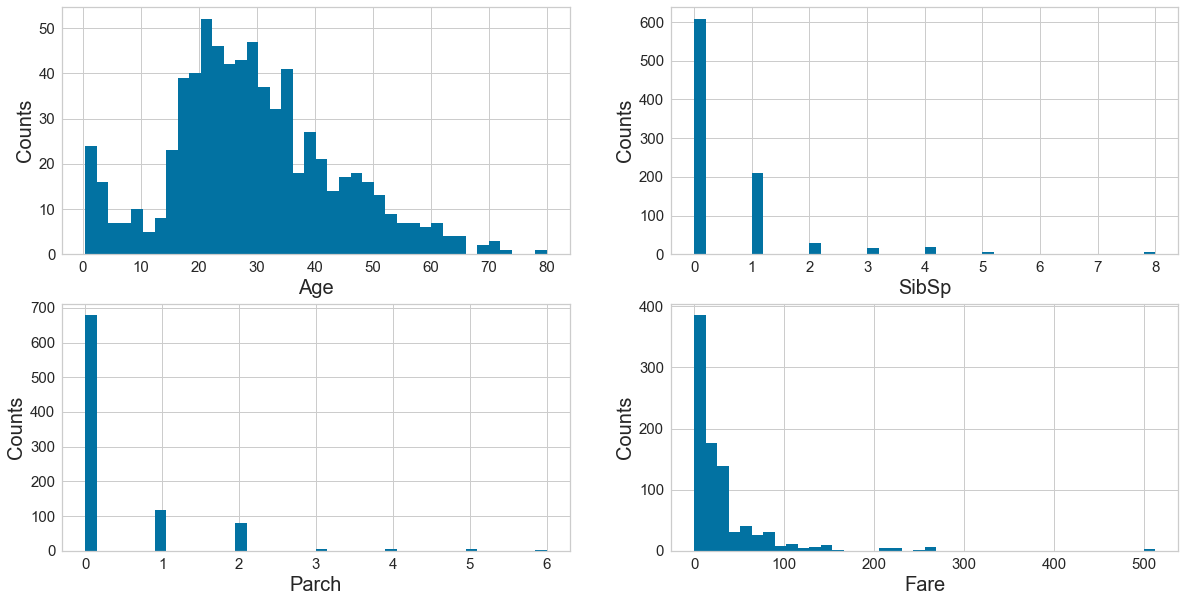

In [7]:
#Step 6: import visulization packages

import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()


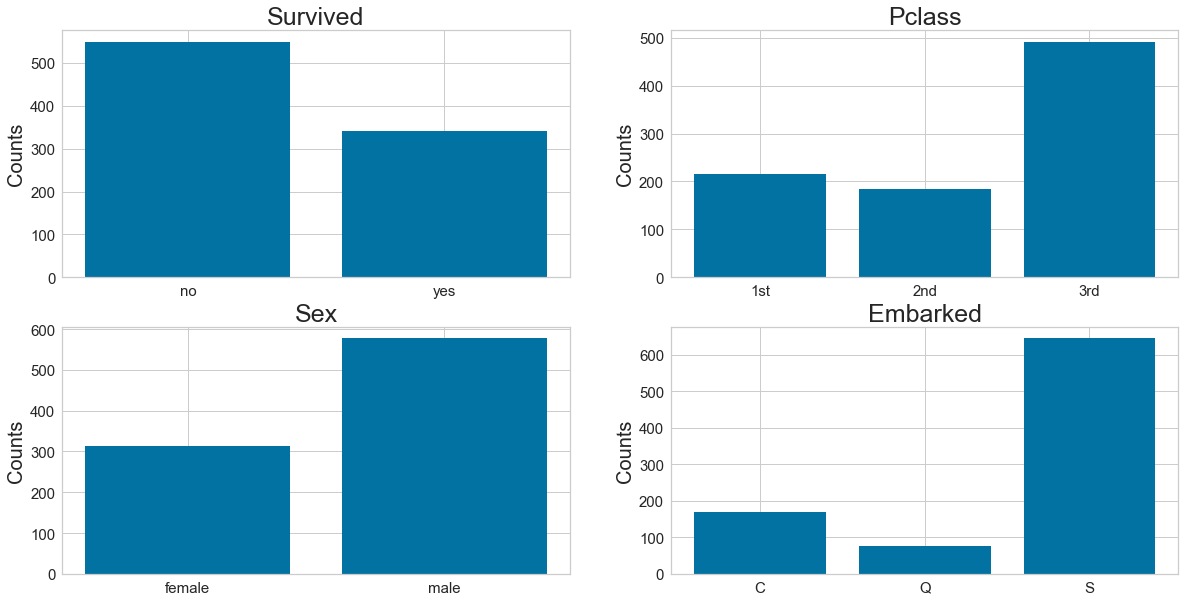

In [8]:
#7:  Barcharts: set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()


/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/features/rankd.py:216: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


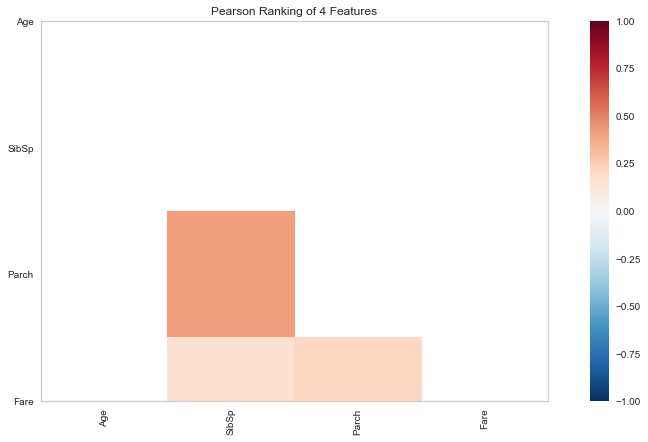

In [9]:
#Step 8: Pearson Ranking
#set up the figure size

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
plt.show()




/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


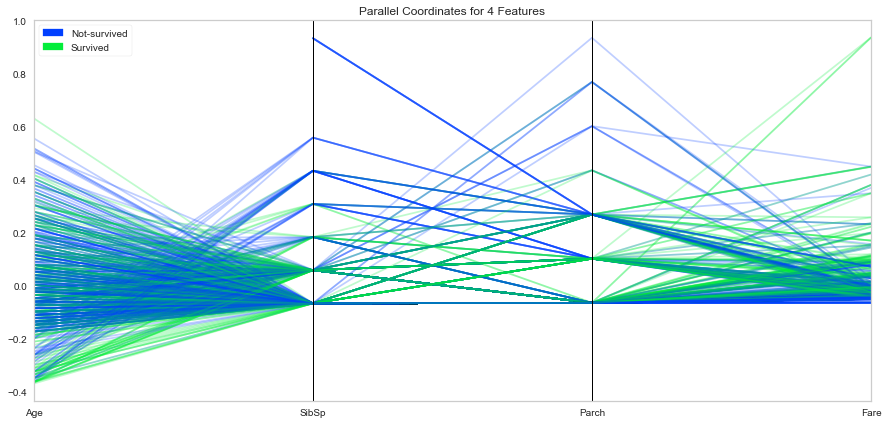

In [10]:
# Step 9:  Compare variables against Survived and Not Survived
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.Survived.as_matrix()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="~Desktop") # Draw/show/poof the data
plt.show();


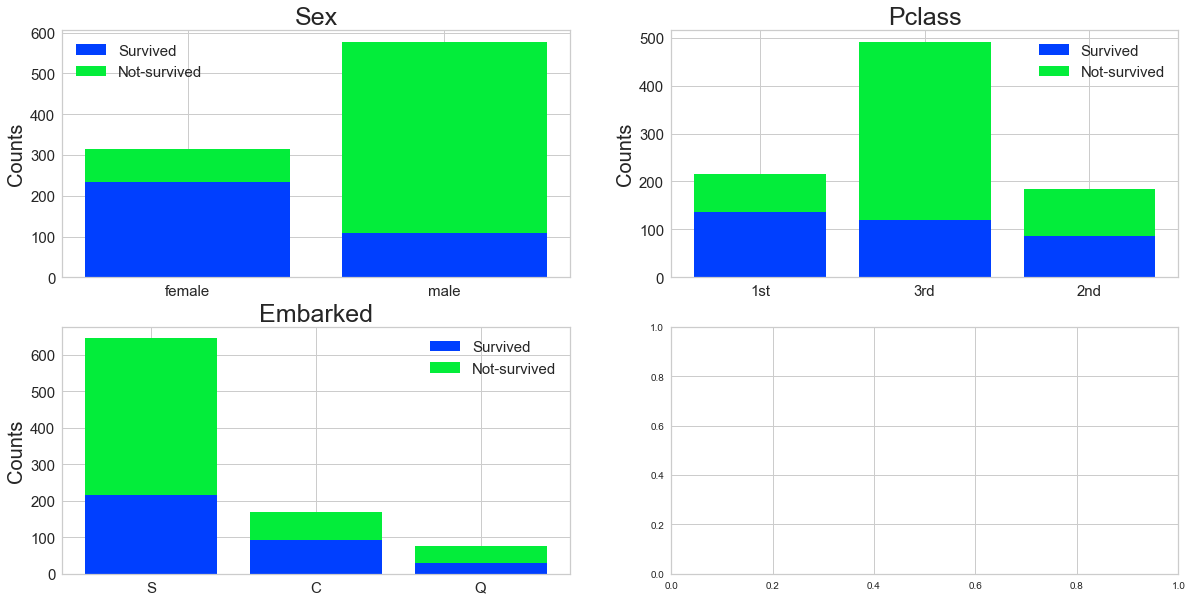

In [11]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show()



## Titanic Tutorial: Part 2 
### Steps (11-13)

In [12]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value

def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age'])

# check the result
print(data['Age'].describe())

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['Embarked'])

# check the result
print(data['Embarked'].describe())

# import package
import numpy as np

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['Fare_log1p'] = log_transformation(data['Fare'])

# check the data
print(data.describe())


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Fare_log1p  
count  891.000000  891.000000  891.000000  
mean     

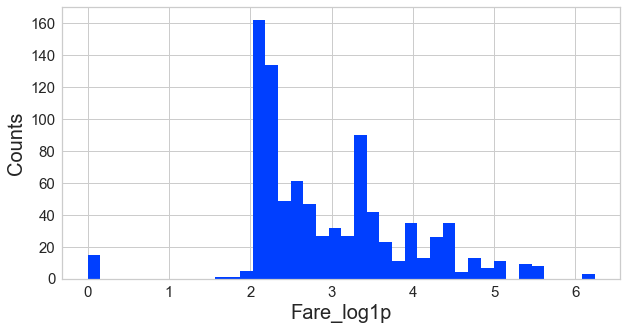

In [13]:
#Step 12 - adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()



In [14]:
#Step 13 - convert categorical data to numbers

#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))


   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  


## Titanic Tutorial: Part 3
### Steps (14-15)

In [15]:
#Titanic Turotial Part 3:  
#Graphics Analysis
#Feature Reduction (Extraction/Selection)
#Filling in Missing Values
#Split_Train_Test
#Model Selection and Evaluation

In [16]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together

features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  623
No. of samples in validation set: 268


No. of survived and not-survived in the training set:
Not_survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
Not_survived    176
Survived         92
Name: Survived, dtype: int64


/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


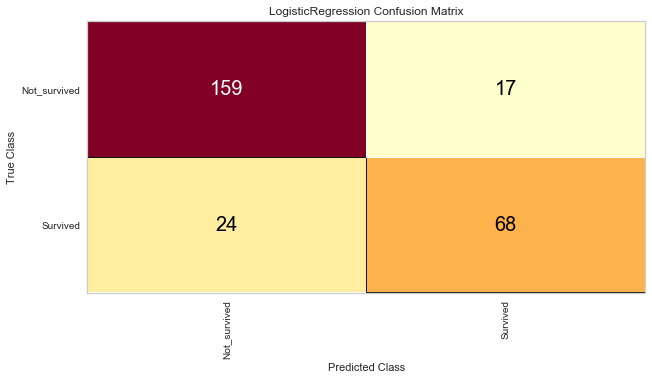

/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


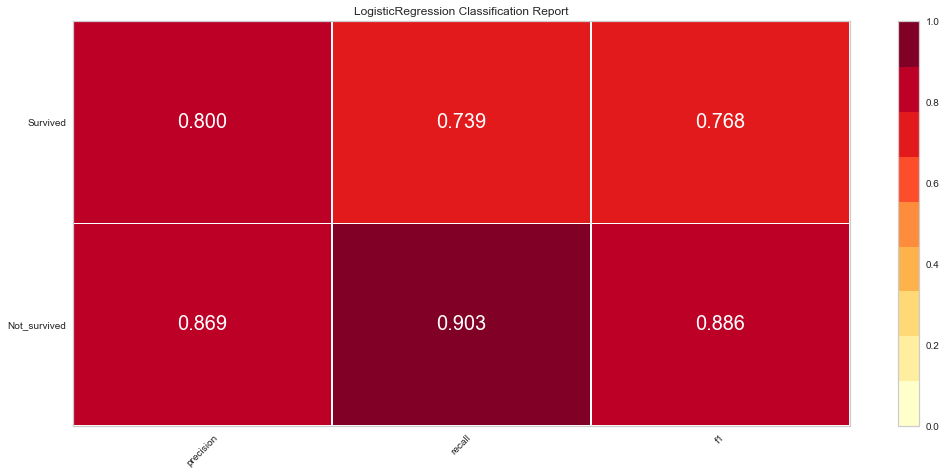

/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


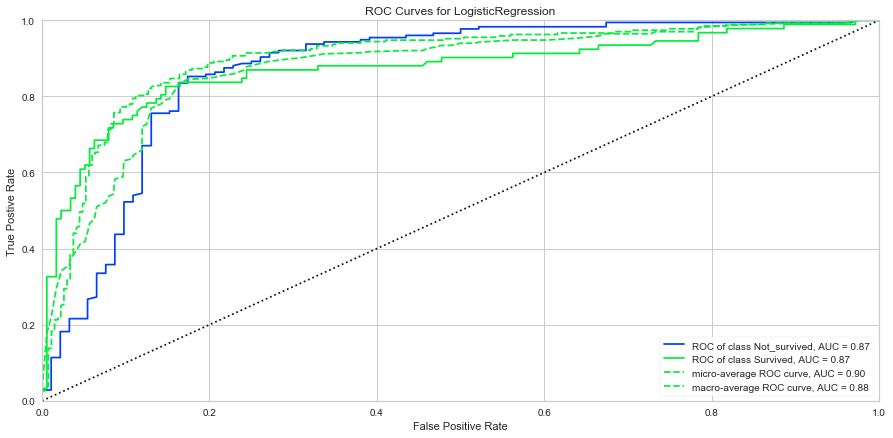

In [17]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()
